In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
# 각 모델별 JSON 파일 경로 설정
model_files = {
    "deepseek": "/content/drive/MyDrive/2025-2 YAICON/Inference/deepseek_hr_evaluation_result.json",
    "gemini": "/content/drive/MyDrive/2025-2 YAICON/Inference/gemini_evaluation_results.json",
    "gpt": "/content/drive/MyDrive/2025-2 YAICON/Inference/gpt_oss_hr_evaluation_results.json",
    "llama": "/content/drive/MyDrive/2025-2 YAICON/Inference/llama-3.1-8b-instant_results.json",
    "qwen14b": "/content/drive/MyDrive/2025-2 YAICON/Inference/qwen3_14b_hr_evaluation_results.json",
    "qwenmax": "/content/drive/MyDrive/2025-2 YAICON/Inference/results_qwen3-max.json",
}

# 평가 항목
metric_cols = [
    "major_fit",
    "job_competence",
    "foreign_language_ability",
    "professionalism",
    "communication",
    "leadership",
    "negotiation_ability",
    "passion_innovation",
    "integrity_responsibility",
    "community_service_spirit",
]

# ==== JSON → DataFrame 변환 & 하나로 합치기 ====
all_dfs = []

for model_name, file_path in model_files.items():
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    # dict → DataFrame (employee_id를 index에서 column으로 빼오기)
    df = pd.DataFrame.from_dict(data, orient="index").reset_index()
    df = df.rename(columns={"index": "employee_id"})

    # 우리가 분석할 10개 항목만 남기기
    df_metrics = df[["employee_id"] + metric_cols].copy()
    df_metrics["model"] = model_name

    all_dfs.append(df_metrics)

# 모든 모델 결과를 하나의 long-form DataFrame으로
df_all = pd.concat(all_dfs, ignore_index=True)
df_all[metric_cols] = df_all[metric_cols].apply(pd.to_numeric, errors="coerce")

df_all

,employee_id,major_fit,job_competence,foreign_language_ability,professionalism,communication,leadership,negotiation_ability,passion_innovation,integrity_responsibility,community_service_spirit,model
0,E1001000,7.0,7.0,5.0,7.0,7.0,5.0,7.0,7.0,7.0,6.0,deepseek
1,E1001006,6.0,6.0,4.0,6.0,6.0,4.0,6.0,6.0,7.0,6.0,deepseek
2,E1001007,7.0,7.0,5.0,7.0,7.0,5.0,7.0,7.0,7.0,6.0,deepseek
3,E1001009,8.0,8.0,4.0,8.0,7.0,8.0,8.0,7.0,9.0,7.0,deepseek
4,E1001010,6.0,6.0,0.0,8.0,7.0,6.0,7.0,6.0,9.0,5.0,deepseek
...,...,...,...,...,...,...,...,...,...,...,...,...
7188,E100992,4.0,7.0,2.0,8.0,8.0,6.0,7.0,6.0,10.0,8.0,qwenmax
7189,E100993,5.0,7.0,2.0,7.0,5.0,5.0,4.0,9.0,7.0,3.0,qwenmax
7190,E100994,5.0,8.0,2.0,9.0,7.0,7.0,6.0,7.0,9.0,5.0,qwenmax
7191,E100995,7.0,8.0,2.0,8.0,6.0,5.0,4.0,9.0,8.0,4.0,qwenmax


In [ ]:
# ==== 모델별 평균 ====
mean_by_model = df_all.groupby("model")[metric_cols].mean()
print("모델별 평균 점수")
print(mean_by_model)

# ==== 모델별 분산 ====
var_by_model = df_all.groupby("model")[metric_cols].var()
print("\n모델별 분산")
print(var_by_model)

# ==== coefficient of variation (표준편차 / 평균) ====
std_by_model = df_all.groupby("model")[metric_cols].std()
cv_by_model = std_by_model / mean_by_model  # 상대적인 변동성
print("\n모델별 CV(표준편차/평균)")
print(cv_by_model)

모델별 평균 점수
          major_fit  job_competence  foreign_language_ability  \
model                                                           
deepseek   6.544621        6.991660                  0.054212   
gemini     5.891667        6.384167                  4.070833   
gpt        6.278057        6.637353                  1.902848   
llama      5.889167        7.047500                  0.169167   
qwen14b    6.212500        6.912917                  3.415000   
qwenmax    6.187083        6.897917                  2.081667   

          professionalism  communication  leadership  negotiation_ability  \
model                                                                       
deepseek         7.212677       6.461635    4.989992             5.446205   
gemini           5.815833       6.349167    4.859167             5.113333   
gpt              6.799832       6.972362    4.861809             4.518425   
llama            8.188333       7.625000    6.240833             6.441667   
qwen14b

/tmp/ipython-input-3499480175.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=models)


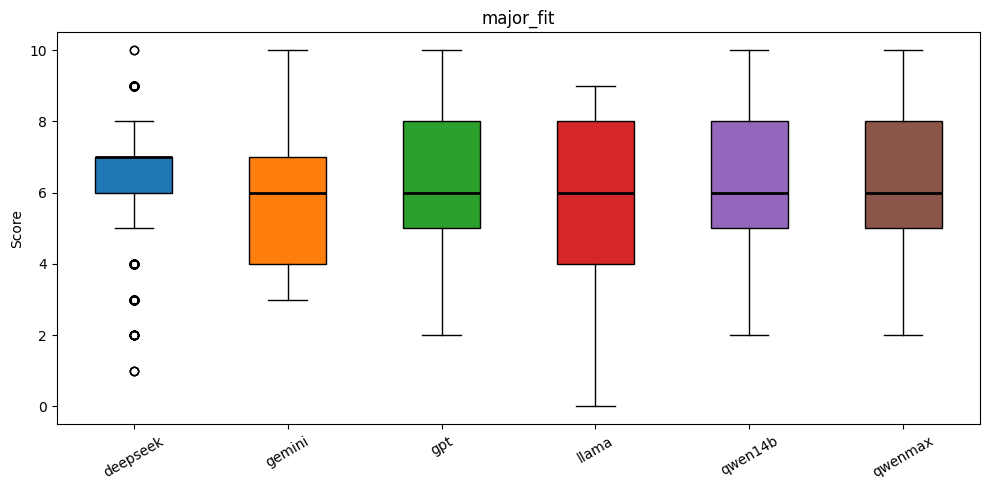

/tmp/ipython-input-3499480175.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=models)


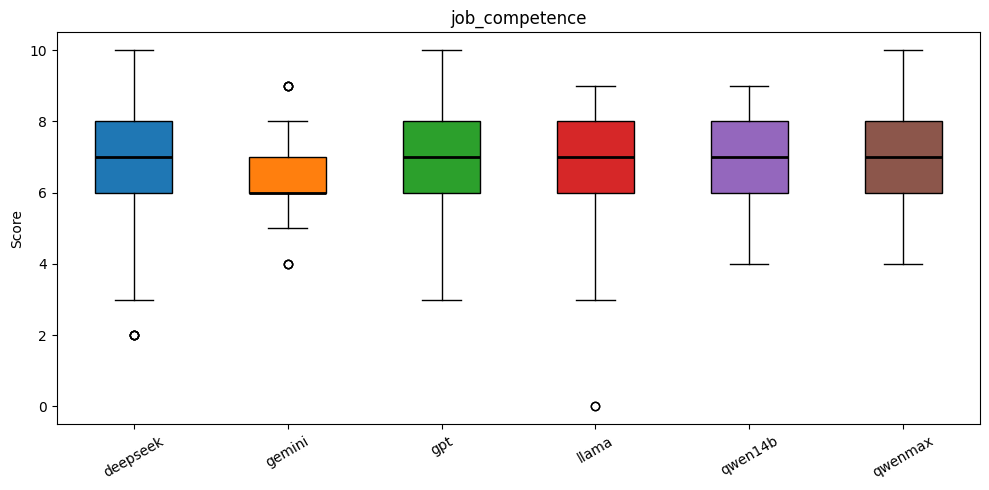

/tmp/ipython-input-3499480175.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=models)


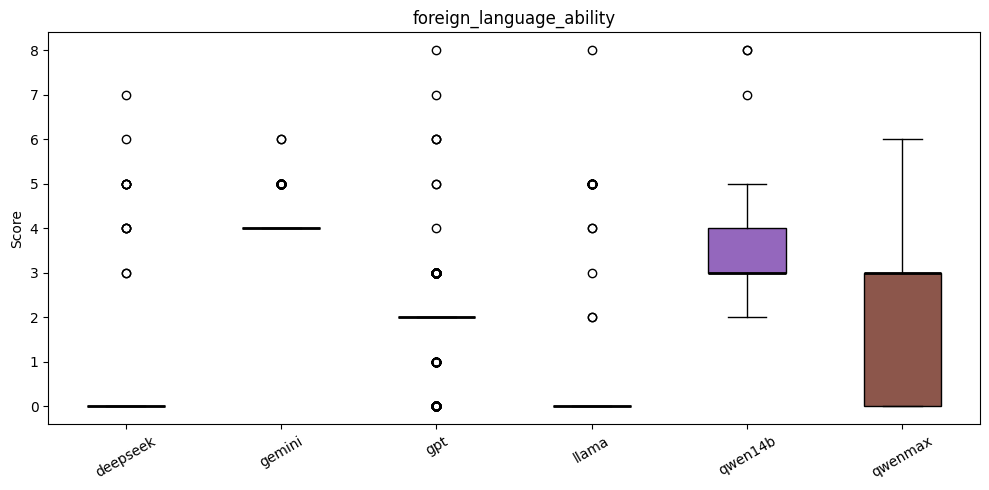

/tmp/ipython-input-3499480175.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=models)


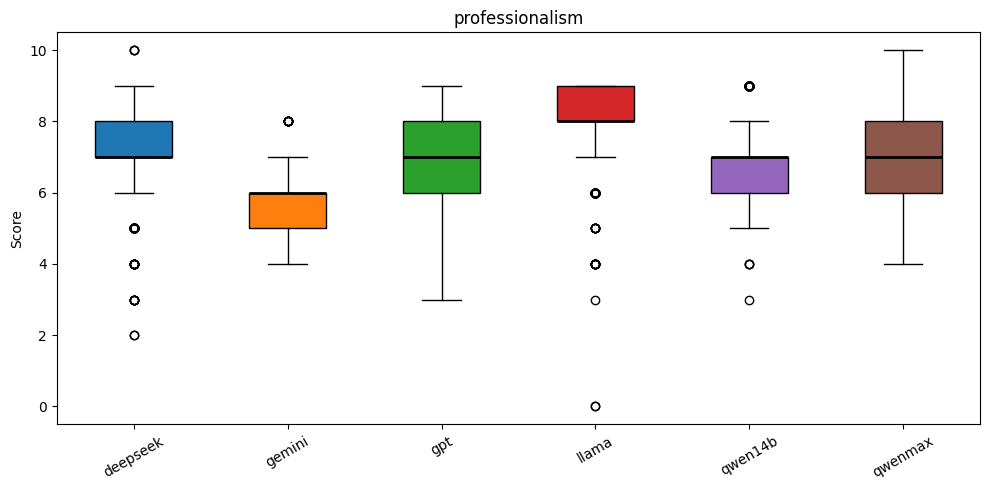

/tmp/ipython-input-3499480175.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=models)


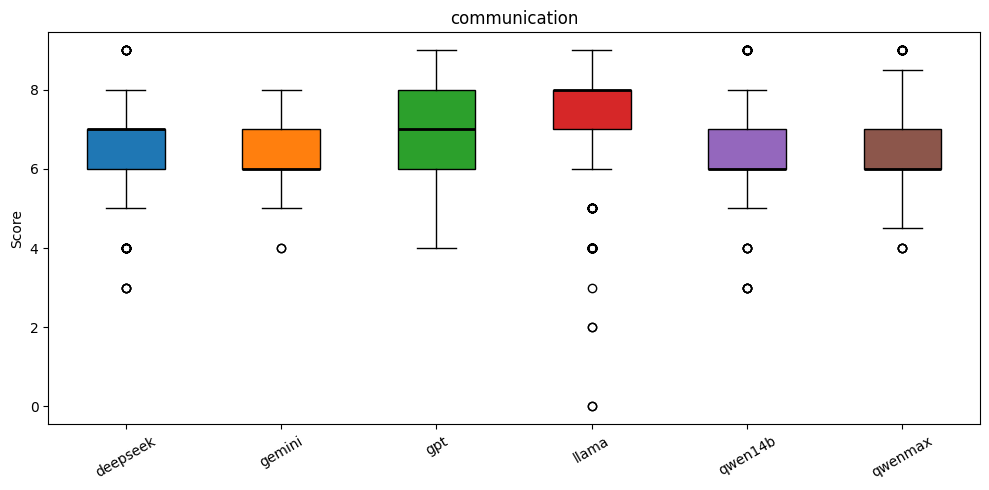

/tmp/ipython-input-3499480175.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=models)


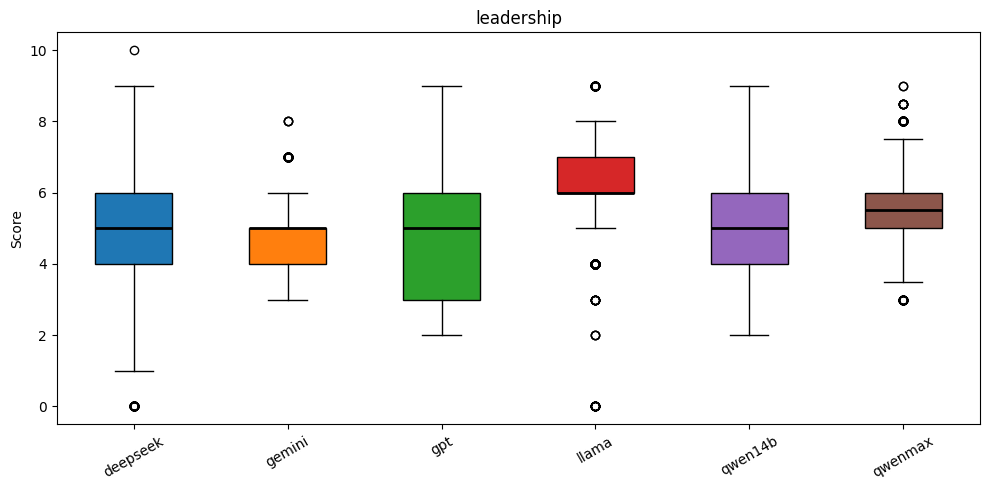

/tmp/ipython-input-3499480175.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=models)


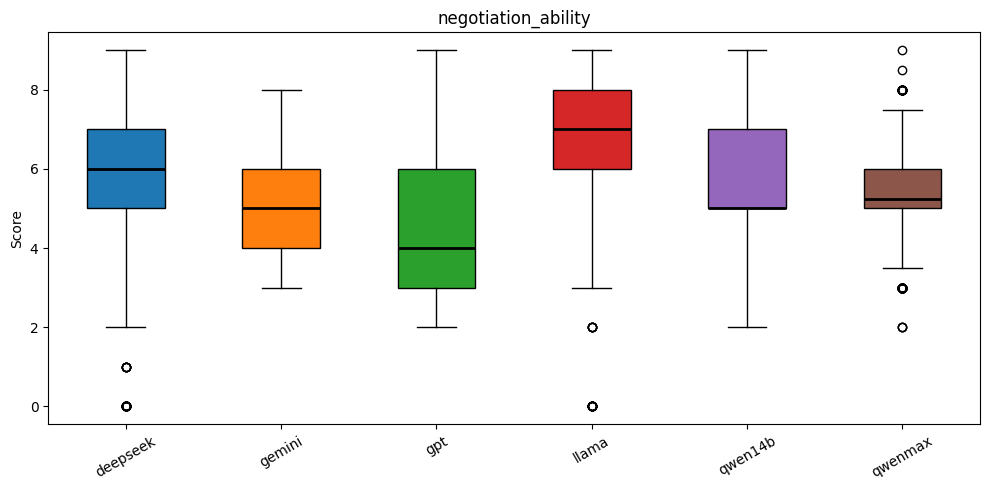

/tmp/ipython-input-3499480175.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=models)


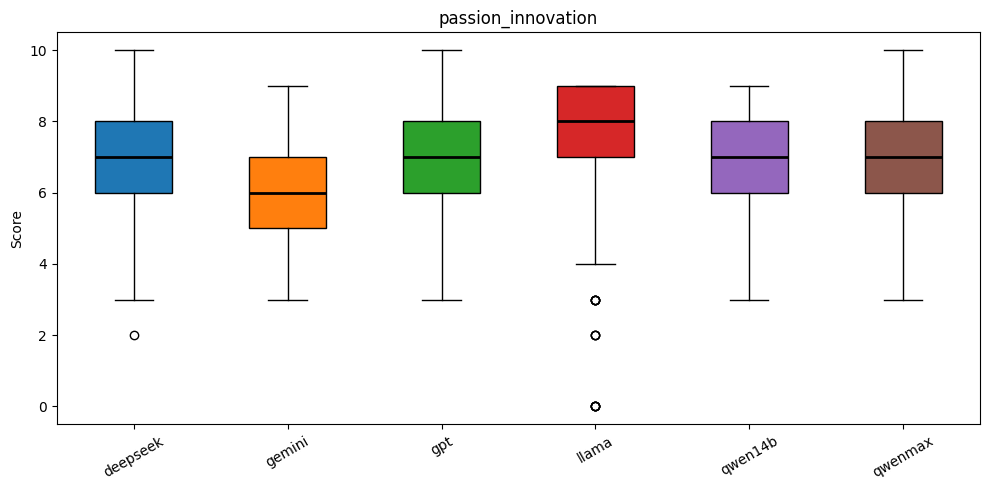

/tmp/ipython-input-3499480175.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=models)


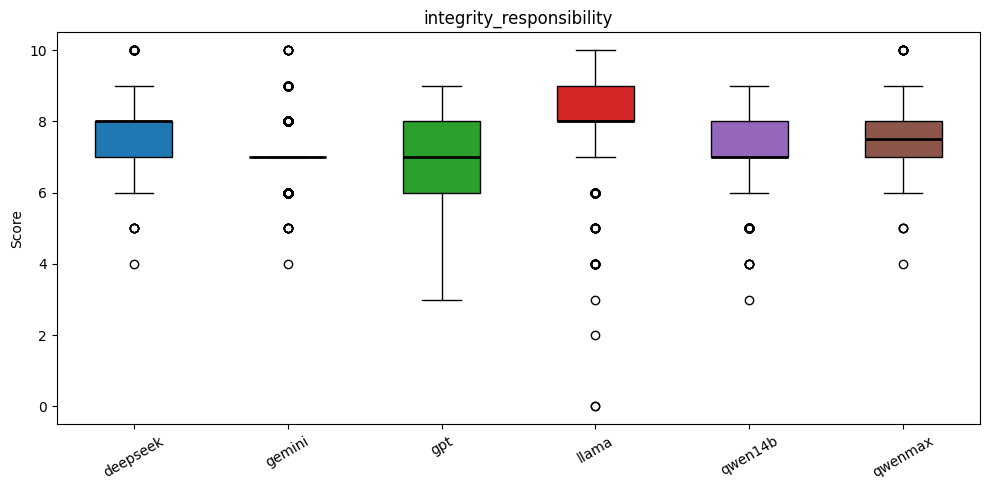

/tmp/ipython-input-3499480175.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=models)


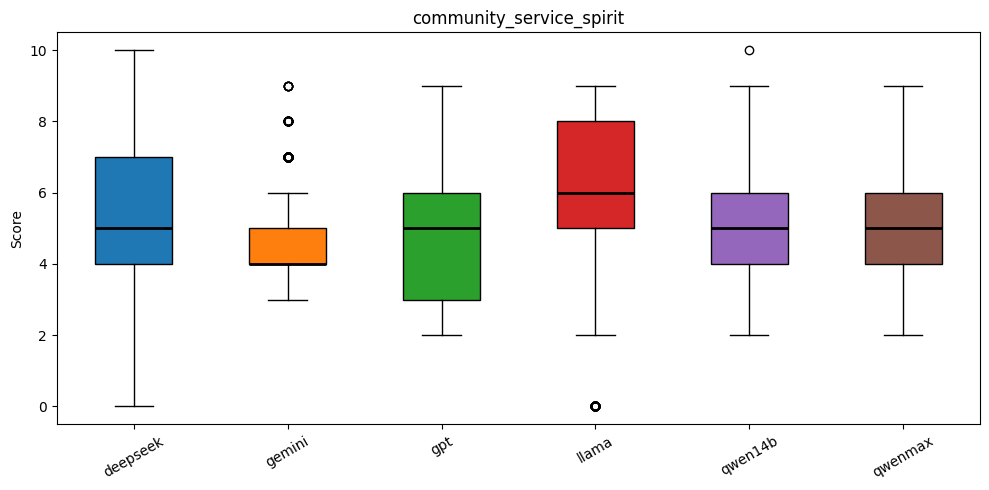

In [ ]:
# [시각화 1] BoxPlot

import seaborn as sns

model_colors = {
    "deepseek": "#1f77b4",
    "gemini": "#ff7f0e",
    "gpt": "#2ca02c",
    "llama": "#d62728",
    "qwen14b": "#9467bd",
    "qwenmax": "#8c564b",
}

for metric in metric_cols:
    fig, ax = plt.subplots(figsize=(10,5))

    models = df_all["model"].unique()
    data = [df_all[df_all["model"] == m][metric] for m in models]

    box = ax.boxplot(data, patch_artist=True, labels=models)

    for patch, model in zip(box['boxes'], models):
        patch.set_facecolor(model_colors.get(model, "#cccccc"))

    for median in box['medians']:
        median.set(color='black', linewidth=2)

    ax.set_title(f"{metric}")
    ax.set_ylabel("Score")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()



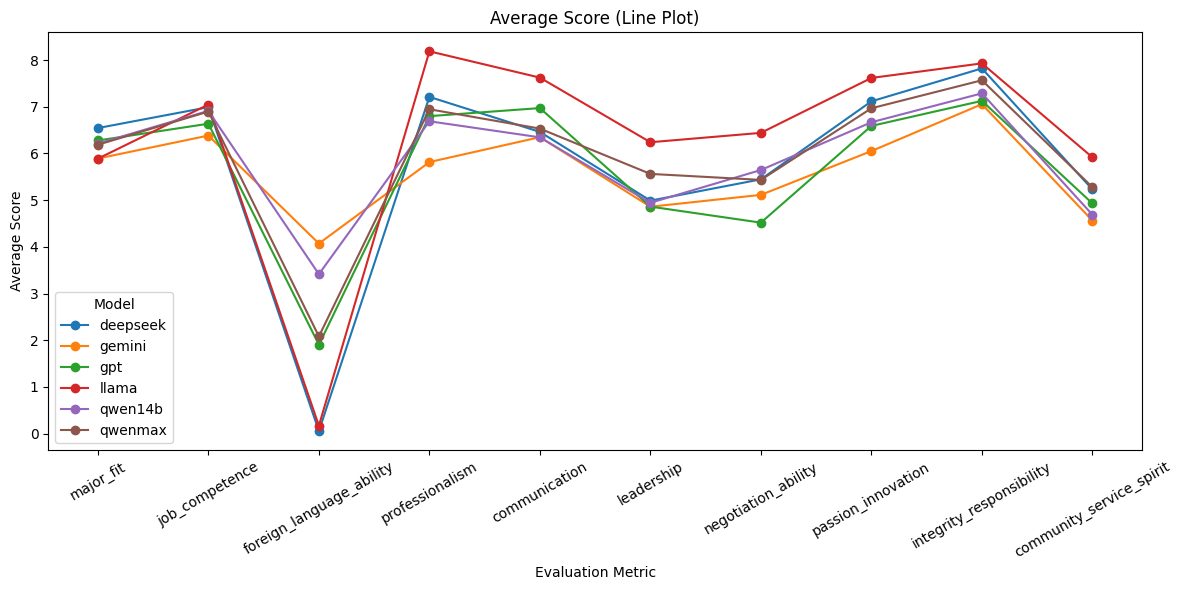

In [ ]:
# [시각화 2] Average Plot
import matplotlib.pyplot as plt
import numpy as np

# 모델별 평균 계산
mean_by_model = df_all.groupby("model")[metric_cols].mean()

plt.figure(figsize=(12,6))

for model in mean_by_model.index:
    plt.plot(metric_cols,
             mean_by_model.loc[model],
             marker='o',
             label=model)

plt.xticks(rotation=30)
plt.xlabel("Evaluation Metric")
plt.ylabel("Average Score")
plt.title("Average Score (Line Plot)")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

In [ ]:
# 평가 성향 (Cosine Similarity) ****
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

mean_matrix = mean_by_model.values

cosine_dist = cosine_distances(mean_matrix)
euclid_dist = euclidean_distances(mean_matrix)

cosine_df = pd.DataFrame(cosine_dist, index=mean_by_model.index, columns=mean_by_model.index)
euclid_df = pd.DataFrame(euclid_dist, index=mean_by_model.index, columns=mean_by_model.index)

print("Cosine Distance Between Models")
print(cosine_df)


Cosine Distance Between Models
model     deepseek    gemini       gpt     llama   qwen14b   qwenmax
model                                                               
deepseek  0.000000  0.027059  0.006833  0.004063  0.016588  0.006267
gemini    0.027059  0.000000  0.010058  0.028689  0.002024  0.008450
gpt       0.006833  0.010058  0.000000  0.009468  0.005675  0.002021
llama     0.004063  0.028689  0.009468  0.000000  0.018702  0.007205
qwen14b   0.016588  0.002024  0.005675  0.018702  0.000000  0.003599
qwenmax   0.006267  0.008450  0.002021  0.007205  0.003599  0.000000


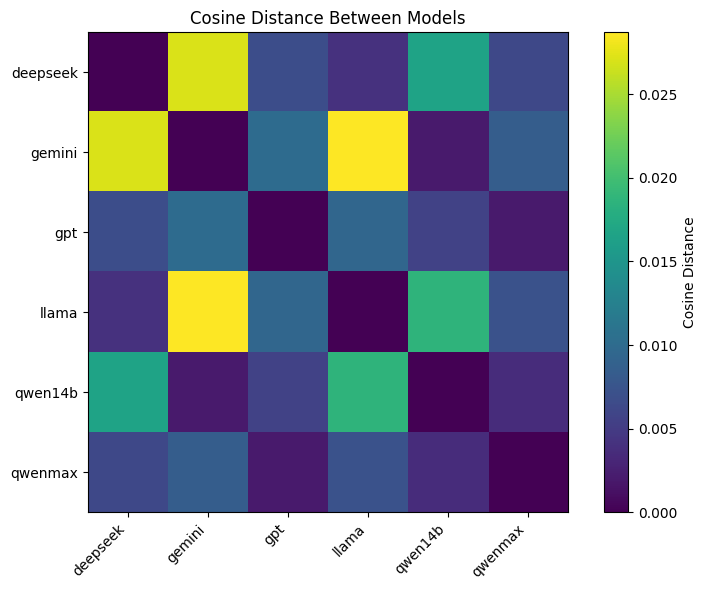

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances

# === Cosine Distance 계산 ===
mean_matrix = mean_by_model.values
cosine_dist = cosine_distances(mean_matrix)

cosine_df = pd.DataFrame(
    cosine_dist,
    index=mean_by_model.index,
    columns=mean_by_model.index
)

# === 시각화 ===
plt.figure(figsize=(8, 6))

plt.imshow(cosine_df.values)
plt.xticks(
    np.arange(len(cosine_df.columns)),
    cosine_df.columns,
    rotation=45,
    ha="right"
)
plt.yticks(
    np.arange(len(cosine_df.index)),
    cosine_df.index
)

plt.title("Cosine Distance Between Models")
plt.colorbar(label="Cosine Distance")
plt.tight_layout()
plt.show()